# Equipo: 3
# Grupo: 002, Miércoles
## Integrantes: 
- 1941502 Vidal Mosqueda Cristina
- 1811901 García Salazar Orlando
- 1644680 Macías Cortés Isaí Adriel
- 1849522 Mora Martínez Gerardo

## Base de datos principal
### **US Consumer Finance Complaints**

- **Url:** https://www.kaggle.com/cfpb/us-consumer-finance-complaints

## Introducción: 
Los servicios bancarios suelen presentar fallas, por lo que a consecuencia de esto, los clientes presentan quejas hacia los bancos. Nuestra base de datos se basa en las quejas que presentan los consumidores a los bancos estadounidenses.

## Descripción de los datos: 
Son reclamos hechos por los clientes, las cuales, son registradas por la CFPB (Consumer Financial Protection Bureau) que se introducen a una base de datos que generan una matriz de todas las quejas financieras que se hicieron en Estados Unidos de América.

## Descripción de las columnas:
De nuestra limpieza de la base de datos, las columnas que la conforma son: 
- **date_received:** Fecha en la que la queja fue enviada por el cliente (**Tipo de dato:** Fecha).
- **product:** El producto financiero referente a la queja que solicitó el cliente (**Tipo de dato:** Cadena de texto).
- **issue:** El título general establecido para identificar la queja del cliente (**Tipo de dato:** Cadena de texto).
- **company:** El banco en el que el cliente solicitó el servicio (**Tipo de dato:** Cadena de texto).
- **state:** Estado en el que esta localizado el banco (**Tipo de dato:** Cadena de texto).
- **submitted_via:** Medio por el cual la queja fue enviada (**Tipo de dato:** Cadena de texto).
- **date_sent_to_company:** Fecha en la que se recibió al banco el reclamo del cliente (**Tipo de dato:** Fecha).
- **company_response_to_consumer:** Respuesta del banco hacia el consumidor (**Tipo de dato:** Cadena de texto).
- **timely_response:** Especifica si la queja fue contestada en el tiempo establecido del banco (**Tipo de dato:** Cadena de texto).
- **consumer_disputed:** Especifica si el cliente quedó satisfecho con la solución(**Tipo de dato:** Cadena de texto).

## Justificación del uso de datos:
Nos llamó la atención los tipos de quejas y los productos financieros a los que se estaban refiriendo.Creemos que con estos datos podemos identificar el mejor banco con menores quejas de este producto para ayudar al cliente a tomar una mejor decisión que banco seleccionar conforme a sus necesidades del producto financiero requerido.

## Objetivos Principales:
- Encontrar los mejores estados con menor quejas de cada producto financiero.
- Encontrar los estados con mayor y menor satisfacción al cliente con respecto a los productos financieros de los bancos.

## Objetivos Secundarios:
- Encontrar los bancos con mayor y menor satisfacción al cliente con respecto a sus productos financieros.

## Preguntas de interés:
1) ¿Qué banco de USA presenta mayores quejas?
2) ¿Qué banco de USA presenta menores quejas?
3) ¿Qué tipo de quejas tiene cada banco?

## Programación:
- **Título:** "US Consumer Finance Complaints"
- **Url:** https://www.kaggle.com/cfpb/us-consumer-finance-complaints

# Desarrollo de las herramientas

1.- Mostraremos los  primeros 5 registros de los datos sin manipulación:

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Lectura de archivo
df = pd.read_csv("consumer_complaints.csv",encoding='utf8')
df.head()

C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


2.- Eliminaremos las columnas no deseados para nuestro estudio:
- **sub_product:** No nos llama la atención el sub producto de los productos financieros.
- **sub_issue:** No nos interesa la sub queja de la queja del cliente.
- **consumer_complaint_narrative:** La descripción de la queja de cada cliente de la base de datos no nos proporciona información relevante para el estudio, más que la razón de la originación de la queja.
- **company_public_response:** Esta columna no forma parte de nuestro estudio
- **zipcode:** El código postal no proporciona información que nos ayude a nuestro estudio.
- **tags:** Esta columna no da relevancia a nuestro estudio
- **consumer_consent_provided:** No es de nuestro interés saber si el cliente recibió consentimiento
- **complaint_id:** El ID de queja no es relevante para la investigación.

Y cambiaremos la mayoría de los nombres de las

In [107]:
#Columnas innecesarias
aux = df.drop(['sub_product','sub_issue','consumer_complaint_narrative','company_public_response','zipcode','tags','consumer_consent_provided','complaint_id'],axis = 1)

#Cambiamos los nombres de las columnas para mayor entendimiento de la base de datos
aux = aux.rename(columns = {'date_received':'Fecha_Enviada_por_el_Cliente'})
aux = aux.rename(columns = {'product':'Producto_Financiero'})
aux = aux.rename(columns = {'issue':'Queja'})
aux = aux.rename(columns = {'company':'Banco'})
aux = aux.rename(columns = {'state':'Diminutivo_de_Estado_de_USA'})
aux = aux.rename(columns = {'submitted_via':'Medio_de_Envío'})
aux = aux.rename(columns = {'date_sent_to_company':'Fecha_Recibida_al_Banco'})
aux = aux.rename(columns = {'timely_response':'¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?'})
aux = aux.rename(columns = {'consumer_disputed?':'¿Cliente_insastifecho_a_la_solución?'})

aux.head()

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,company_response_to_consumer,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_insastifecho_a_la_solución?
0,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
1,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
2,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,Postal mail,09/18/2013,Closed with explanation,Yes,No
3,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,Email,08/30/2013,Closed with explanation,Yes,Yes
4,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,Web,08/30/2013,Closed with explanation,Yes,Yes


3.-Checamos si cada columna de la base contiene datos nulos.

In [108]:
aux.isnull().any()

Fecha_Enviada_por_el_Cliente                     False
Producto_Financiero                              False
Queja                                            False
Banco                                            False
Diminutivo_de_Estado_de_USA                       True
Medio_de_Envío                                   False
Fecha_Recibida_al_Banco                          False
company_response_to_consumer                     False
¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?    False
¿Cliente_insastifecho_a_la_solución?             False
dtype: bool

Analizando el resultando anterior, podemos apreciar que la columna de los estados muestran datos nulos, por lo que tendremos que quitar aquellas filas con este dato nulo para obtener una base de datos limpia.

In [109]:
#Tamaño de la base primaria
aux

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,company_response_to_consumer,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_insastifecho_a_la_solución?
0,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
1,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
2,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,Postal mail,09/18/2013,Closed with explanation,Yes,No
3,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,Email,08/30/2013,Closed with explanation,Yes,Yes
4,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,Web,08/30/2013,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,"Loan modification,collection,foreclosure",Bank of America,NaN,Referral,07/07/2014,Closed with explanation,Yes,No
555953,07/01/2014,Mortgage,"Loan servicing, payments, escrow account",Residential Credit Solutions,NaN,Referral,07/23/2014,Closed with explanation,No,No
555954,07/10/2012,Mortgage,"Loan modification,collection,foreclosure",BB&T Financial,NaN,Phone,11/18/2013,Closed with explanation,Yes,No
555955,04/14/2015,Debt collection,Communication tactics,Global Recovery Group,NaN,Phone,04/14/2015,Untimely response,No,No


In [110]:
#Quitamos las filas con nulos
baselimp = aux.dropna()

#Tamaño de la base final
baselimp

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,company_response_to_consumer,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_insastifecho_a_la_solución?
0,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
1,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,Referral,09/03/2013,Closed with explanation,Yes,Yes
2,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,Postal mail,09/18/2013,Closed with explanation,Yes,No
3,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,Email,08/30/2013,Closed with explanation,Yes,Yes
4,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,Web,08/30/2013,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
553092,03/23/2016,Mortgage,"Loan modification,collection,foreclosure",Bank of America,NJ,Web,03/31/2016,In progress,Yes,No
553093,03/31/2016,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,OH,Referral,04/04/2016,Closed with explanation,Yes,No
553094,03/08/2016,Mortgage,"Loan servicing, payments, escrow account",Dovenmuehle Mortgage Inc.,CO,Web,03/08/2016,Closed with explanation,Yes,No
553095,03/28/2016,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,PA,Referral,03/31/2016,Closed with explanation,Yes,No


Al haber quitado las filas que contenían nulos, siendo estos una cantidad de 4,887 registros, los cuales representan 0.87% del total de los registros de nuestra base de datos, por lo que no genera cambios significativos en el análisis.

4.- Ya dada las modificaciones, procedemos a pasar la base de datos a un nuevo archivo.

In [111]:
#Exportamos base a csv
baselimp.to_csv('Base_Limpia_Quejas_Financieras.csv', index = False)
#Hacemos la lectura de la nueva base
nudf = pd.read_csv("Base_Limpia_Quejas_Financieras.csv",encoding='utf8')


# Estadística Básica

Con nuestra nueva base de datos, procederemos a realizar estadísticos para analizar los datos. Los estadísticos a utilizar es el máximo y el mínimo (que nos proporciona aquél producto financiero con mayores/menores quejas).

Queremos usar el comando "describe()", para checar el tiempo entre la fecha que se envió la queja del cliente hasta la fecha en la cual el banco recibió la queja, considerando que la respuesta del banco al cliente se proporciona en el mismo día de llegada, por lo que se tuvo que agregar otra columna para obtener este dato, y ya con esto, hacer un análisis de de estos resultados.

In [112]:
from collections import Counter
import operator as op
ps = Counter(nudf['Producto_Financiero'])
pi = dict(ps)

maxi= max(pi.items(),key = op.itemgetter(1))
mini=min(pi.items(),key = op.itemgetter(1))

print("Máximo: %s\nMínimo: %s" % (maxi,mini))

Máximo: ('Mortgage', 185187)
Mínimo: ('Other financial service', 542)


El producto con mayor quejas en USA fue la hipoteca, con una cantidad de 185,187 (esta cantidad representa 33.6% de todas las quejas); y el producto financiero con menor quejas fue el de "Otros servicios financieros", con un total de 542 quejas (0.0009% de las quejas totales).

In [113]:
from datetime import datetime, timedelta
#Se corre una vez estas 2 líneas para convertir de tipo objeto a fecha
#nudf['Fecha_Recibida_al_Banco'] = nudf['Fecha_Recibida_al_Banco'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))
#nudf['Fecha_Enviada_por_el_Cliente'] = nudf['Fecha_Enviada_por_el_Cliente'].apply(lambda _ : datetime.strptime(_,"%m/%d/%Y"))

nudf['Diferencia de Tiempo'] = nudf['Fecha_Recibida_al_Banco'].sub(nudf['Fecha_Enviada_por_el_Cliente'], axis=0)
nudf['Diferencia de Tiempo'] = nudf['Diferencia de Tiempo'] / np.timedelta64(1, 'D') 
nudf

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,company_response_to_consumer,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_insastifecho_a_la_solución?,Diferencia de Tiempo
0,2013-08-30,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,Referral,2013-09-03,Closed with explanation,Yes,Yes,4.0
1,2013-08-30,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,Referral,2013-09-03,Closed with explanation,Yes,Yes,4.0
2,2013-08-30,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,Postal mail,2013-09-18,Closed with explanation,Yes,No,19.0
3,2013-08-30,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,Email,2013-08-30,Closed with explanation,Yes,Yes,0.0
4,2013-08-30,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,Web,2013-08-30,Closed with explanation,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...
551065,2016-03-23,Mortgage,"Loan modification,collection,foreclosure",Bank of America,NJ,Web,2016-03-31,In progress,Yes,No,8.0
551066,2016-03-31,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,OH,Referral,2016-04-04,Closed with explanation,Yes,No,4.0
551067,2016-03-08,Mortgage,"Loan servicing, payments, escrow account",Dovenmuehle Mortgage Inc.,CO,Web,2016-03-08,Closed with explanation,Yes,No,0.0
551068,2016-03-28,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,PA,Referral,2016-03-31,Closed with explanation,Yes,No,3.0


In [114]:
print(nudf['Diferencia de Tiempo'].describe())
print("Sesgo:",nudf['Diferencia de Tiempo'].skew())
print("Curtosis:",nudf['Diferencia de Tiempo'].kurt())

count    551070.000000
mean          4.647010
std          17.184817
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Diferencia de Tiempo, dtype: float64
Sesgo: 13.05546257077172
Curtosis: 271.2226636524076


Observando el resultado anterior, nos damos cuenta que el mínimo de la diferencia de tiempo es -1, este resultado es irreal, por lo que la base de datos presenta errores tanto en la fecha de envío de la que queja por el cliente y la fecha recibida al banco, por lo que procederemos a contabilizar los "-1" para quitarlos de la base. 

In [115]:
d=nudf[nudf['Diferencia de Tiempo'] == -1].count()
print("Cantidad de diferencias de tiempo igual a -1: %d" % (d[1]))

Cantidad de diferencias de tiempo igual a -1: 7042


Se contabilizan 7042 registros, lo consideramos datos no significativos de la base de datos.

In [116]:
nudf = nudf.drop(nudf[nudf['Diferencia de Tiempo']==-1].index)
nudf

,Fecha_Enviada_por_el_Cliente,Producto_Financiero,Queja,Banco,Diminutivo_de_Estado_de_USA,Medio_de_Envío,Fecha_Recibida_al_Banco,company_response_to_consumer,¿Se_evaluó_a_tiempo_la_respuesta_de_la_queja?,¿Cliente_insastifecho_a_la_solución?,Diferencia de Tiempo
0,2013-08-30,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,Referral,2013-09-03,Closed with explanation,Yes,Yes,4.0
1,2013-08-30,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,Referral,2013-09-03,Closed with explanation,Yes,Yes,4.0
2,2013-08-30,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,Postal mail,2013-09-18,Closed with explanation,Yes,No,19.0
3,2013-08-30,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,Email,2013-08-30,Closed with explanation,Yes,Yes,0.0
4,2013-08-30,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,Web,2013-08-30,Closed with explanation,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...
551065,2016-03-23,Mortgage,"Loan modification,collection,foreclosure",Bank of America,NJ,Web,2016-03-31,In progress,Yes,No,8.0
551066,2016-03-31,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,OH,Referral,2016-04-04,Closed with explanation,Yes,No,4.0
551067,2016-03-08,Mortgage,"Loan servicing, payments, escrow account",Dovenmuehle Mortgage Inc.,CO,Web,2016-03-08,Closed with explanation,Yes,No,0.0
551068,2016-03-28,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,PA,Referral,2016-03-31,Closed with explanation,Yes,No,3.0


Una vez ya eliminado estos registros, procedemos a volver a imprimir:

In [117]:
print(nudf['Diferencia de Tiempo'].describe())
print("Sesgo:",nudf['Diferencia de Tiempo'].skew())
print("Curtosis:",nudf['Diferencia de Tiempo'].kurt())

count    544028.000000
mean          4.720106
std          17.283590
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Diferencia de Tiempo, dtype: float64
Sesgo: 12.986786257051588
Curtosis: 268.25688478230666


La media de tiempo de respuesta de clientes de USA es de 4.72 días, con una desviación estándar del 17.28 días, esto marca la variabilidad que puede tener la respuesta del banco al cliente; la mediana del tiempo de respuesta es de 4 días y el tiempo máximo de respuesta al cliente es de 993 días (este dato puede ser un dato atípico); El sesgo nos indica que el tiempo de respuesta tiene una asimetría positiva, es decir, la distancia al promedio en el primer cuartil es menor que la del tercer cuartil y la curtosis nos indica que la mayor parte de los datos está alrededor de la media.

# Gráficas

Explicaremos el porqué no se puede graficar las siguientes variables de la base:
- Queja: Columna de comentarios individuales de los clientes
- Banco: Se puede graficar, pero hay 3,605 bancos, por lo que es complicado realizar una visualización de la cantidad de quejas por banco
- Fecha_Recibida_al_Banco: Columna de Fechas

Ahora haremos unas gráficas para analizar mejor nuestros registros de la base de datos.

Text(-8.699999999999996, 0.5, 'Número de quejas')

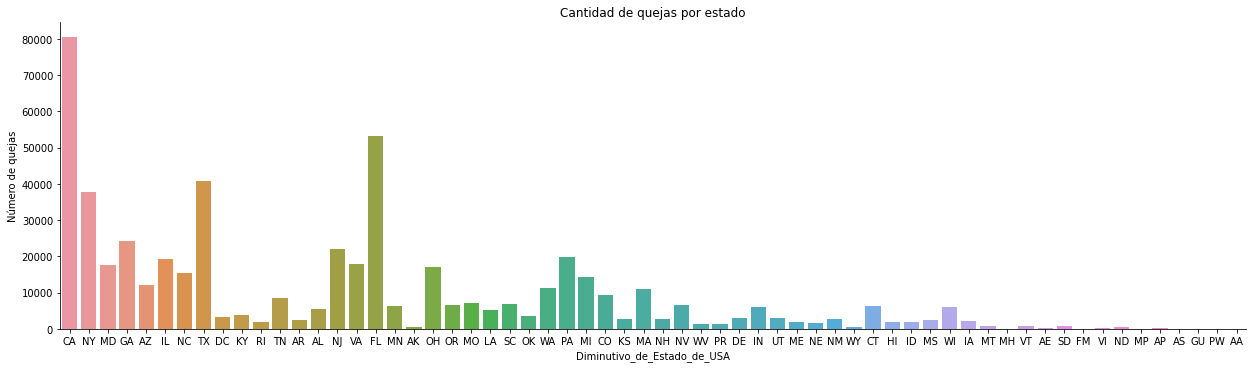

In [118]:
sns.catplot(x="Diminutivo_de_Estado_de_USA", kind="count", data=nudf, aspect= 3.5)
plt.title("Cantidad de quejas por estado")
plt.ylabel("Número de quejas")

Para una mayor visualización de aquellos estados con menor quejas:

In [119]:
listasum1,listaname1=[],[]
tipo1=nudf['Diminutivo_de_Estado_de_USA'].unique().tolist()
s=len(tipo1)
for i in range(s):
    a=nudf[nudf["Diminutivo_de_Estado_de_USA"]==tipo1[i]].count()[1]
    listasum1.append(a)
    listaname1.append(tipo1[i])

tabla1 = {'Nombre': listaname1,'Número de quejas' : listasum1}
tabla1 = pd.DataFrame(tabla1, columns = ['Nombre','Número de quejas'])
tabla1
tabla1.sort_values(by="Número de quejas",ascending=True)

,Nombre,Número de quejas
61,AA,9
60,PW,9
58,AS,17
56,MP,19
49,MH,27
...,...,...
3,GA,24275
1,NY,37826
7,TX,40798
16,FL,53155


Investigando los diminutivos de los estados provenientes de USA, nos damos que hay territorios no incorporados o no son considerados estados de USA, por lo que procederemos a eliminar estos diminutivo.

In [120]:
#Base de datos
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="AA"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="PW"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="AS"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="MP"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="MH"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="FM"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="GU"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="VI"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="AP"].index)
nudf = nudf.drop(nudf[nudf['Diminutivo_de_Estado_de_USA']=="AE"].index)


#Tabla creada
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="AA"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="PW"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="AS"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="MP"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="MH"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="FM"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="GU"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="VI"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="AP"].index)
tabla1 = tabla1.drop(tabla1[tabla1['Nombre']=="AE"].index)
tabla1.sort_values(by="Número de quejas",ascending=True)

,Nombre,Número de quejas
55,ND,467
41,WY,538
18,AK,630
52,SD,742
48,MT,882
50,VT,934
34,PR,1303
33,WV,1442
39,NE,1721
10,RI,1876


Los mejores bancos con menores quejas de Noviembre 2011 a abril 2016 son ND (Dakota del Norte) con 467 quejas, WY (Wyoming) 538 quejas y AK (Alaska) 630 quejas. Entonces la gráfica quedaría así:

Text(-8.699999999999996, 0.5, 'Número de quejas')

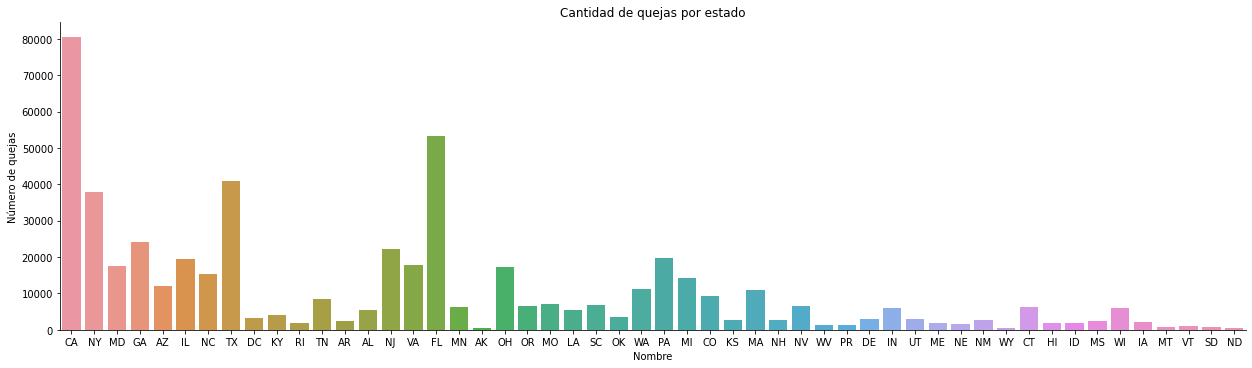

In [121]:
sns.catplot(y="Número de quejas", x= "Nombre", kind="bar", data=tabla1, aspect= 3.5)
plt.title("Cantidad de quejas por estado")
plt.ylabel("Número de quejas")

El estado con mayor quejas fue California, despúes Florida y Texas.

<AxesSubplot:xlabel='Fecha_Enviada_por_el_Cliente', ylabel='Density'>

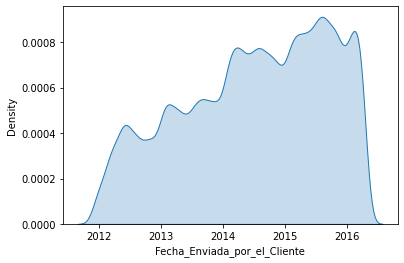

In [122]:
sns.kdeplot(data=nudf['Fecha_Enviada_por_el_Cliente'], shade=True)

De la gráfica anterior, podemos visualizar que las quejas enviadas por los clientes han ido aumentando conforme pasa el tiempo (a partir del año del 2016 baja dada la poca cantidad de datos de ese periodo).

Text(22.675000000000004, 0.5, 'Número de quejas')

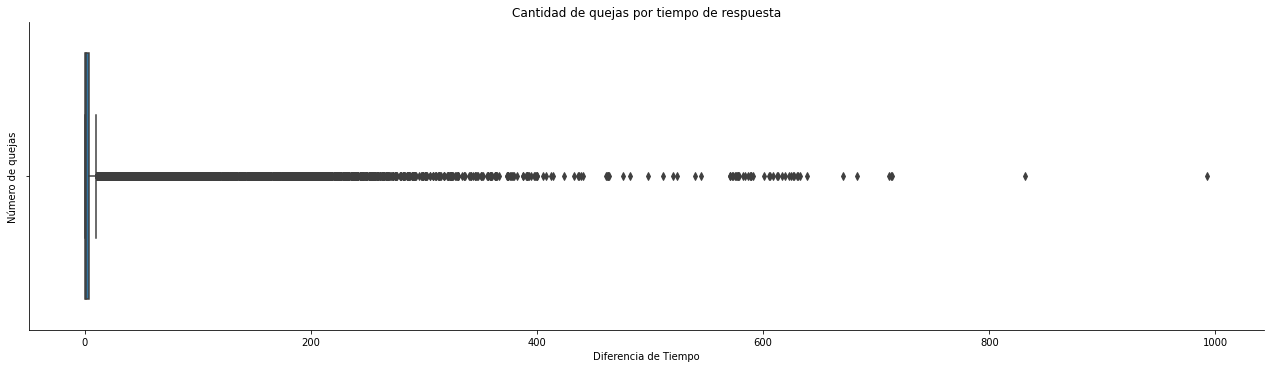

In [123]:
sns.catplot(x= "Diferencia de Tiempo", kind="box", data=nudf, aspect= 3.5)
plt.title("Cantidad de quejas por tiempo de respuesta")
plt.ylabel("Número de quejas")

De este diagrama de caja, podemos apreciar que toda la caja se concentra alredor del cero, por lo que los demás puntos que hasta forman una línea son datos atípicos, y comfirmamos que el dato típico más lejos de la casa es el máximo de los tiempos de respuesta que se vió en la sección de estadística anteriormente.

Text(1448.175, 0.5, 'Número de quejas')

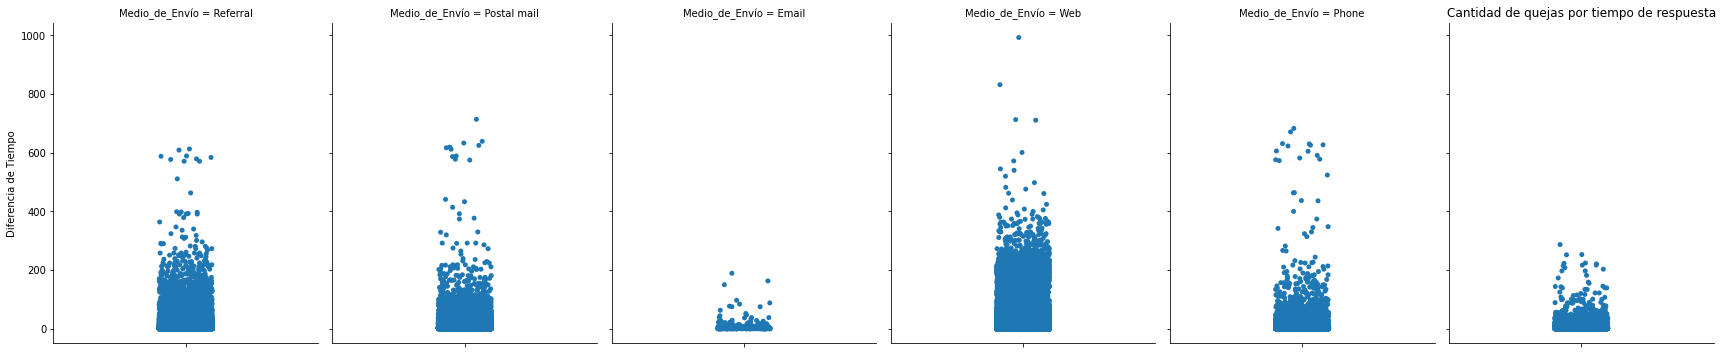

In [124]:
sns.catplot(y= "Diferencia de Tiempo", kind="strip", data=nudf, aspect= 0.8, col = "Medio_de_Envío")
plt.title("Cantidad de quejas por tiempo de respuesta")
plt.ylabel("Número de quejas")

Y este dato atípico, es decir, esta queja se envió por web y las quejas con más longitud de tiempo de respuesta es por web, mientras que la menor es por email.

Text(30.345190972222213, 0.5, 'Número de quejas')

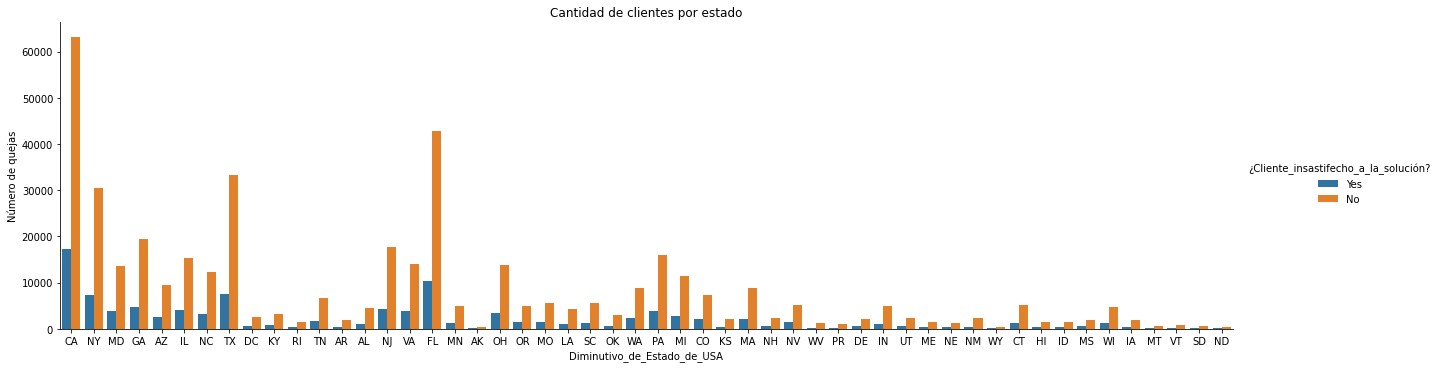

In [127]:
sns.catplot(x= "Diminutivo_de_Estado_de_USA", kind="count", data=nudf, aspect= 3.5, hue= "¿Cliente_insastifecho_a_la_solución?")
plt.title("Cantidad de clientes por estado")
plt.ylabel("Número de quejas")

Los estados con mayor satisfacción al cliente son California (CA), Florida (FL), Texas (TX) y New York (NY).

# Conclusión
De nuestro estudio, encontramos que con el análisis de los resultados de las gráficas, los estados de mayor número de quejas (California, Florida Texas), también tiene la mayor cantidad de clientes satisfechos con la solución de su queja; Al ver la gráfica de la densida, notamos que las quejas han ido aumentando gradualmente, y llega a su punto máximo a mediados del 2015 y de ahí se va reduciendo gradualmente (sabiendo que a partir del 2016 no hay más registros dado que es el límite de la base de datos); El tipo de envío, tanto web, como expediente de remisión, tienen casi el mismo tiempo máximo de respuesta, a pesar de las diferentes cantidades de cada una, por lo que realizar una queja por la web que presencialmente en el banco se tarda casi el mismo tiempo (considerando los datos concentrados de la gráfica strip). A pesar de que hicimos limpieza al principio de nuestro estudio, no considerabamos que al utilizar los datos para realizar los estadísticos descriptivas y analíticos, obtener datos incongruentes como lo fue el tiempo de respuesta, como los diminutivos que no son considerados estados.